In [0]:
!pip install kaggle

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Model
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras import optimizers
from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import os
from tqdm import tqdm
import itertools
import random
from random import shuffle
from pathlib import Path
from time import time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from subprocess import check_output
import cv2
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"done18","key":"6da0a414528d88c4dad50b95d0636b89"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Dec 24 21:56 kaggle.json


In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d slothkong/10-monkey-species

 97% 529M/547M [00:04<00:00, 117MB/s] 
100% 547M/547M [00:05<00:00, 113MB/s]


In [0]:
!ls -l

total 560192
-rw-r--r-- 1 root root 573619422 Dec 24 21:57 10-monkey-species.zip
drwx------ 3 root root      4096 Dec 24 21:56 gdrive
-rw-r--r-- 1 root root        62 Dec 24 21:56 kaggle.json
drwxr-xr-x 1 root root      4096 Dec 18 20:29 sample_data


In [0]:
!unzip 10-monkey-species.zip

Archive:  10-monkey-species.zip
  inflating: training.zip            
  inflating: validation.zip          
  inflating: monkey_labels.txt       


In [0]:
ls -l

total 1120272
-rw-r--r-- 1 root root 573619422 Dec 24 21:57 10-monkey-species.zip
drwx------ 3 root root      4096 Dec 24 21:56 gdrive/
-rw-r--r-- 1 root root        62 Dec 24 21:56 kaggle.json
-rw-r--r-- 1 root root       928 Jun 28 01:39 monkey_labels.txt
drwxr-xr-x 1 root root      4096 Dec 18 20:29 sample_data/
-rw-r--r-- 1 root root 449423724 Jun 28 01:39 training.zip
-rw-r--r-- 1 root root 124087025 Jun 28 01:39 validation.zip


In [0]:
!unzip training.zip

Archive:  training.zip
   creating: training/n0/
  inflating: training/n0/n0018.jpg   
  inflating: training/n0/n0019.jpg   
  inflating: training/n0/n0020.jpg   
  inflating: training/n0/n0021.jpg   
  inflating: training/n0/n0022.jpg   
  inflating: training/n0/n0023.jpg   
  inflating: training/n0/n0024.jpg   
  inflating: training/n0/n0025.jpg   
  inflating: training/n0/n0026.jpg   
  inflating: training/n0/n0027.jpg   
  inflating: training/n0/n0028.jpg   
  inflating: training/n0/n0029.jpg   
  inflating: training/n0/n0030.jpg   
  inflating: training/n0/n0031.jpg   
  inflating: training/n0/n0032.jpg   
  inflating: training/n0/n0033.jpg   
  inflating: training/n0/n0034.jpg   
  inflating: training/n0/n0035.jpg   
  inflating: training/n0/n0036.jpg   
  inflating: training/n0/n0037.jpg   
  inflating: training/n0/n0038.jpg   
  inflating: training/n0/n0039.jpg   
  inflating: training/n0/n0040.jpg   
  inflating: training/n0/n0041.jpg   
  inflating: training/n0/n0042.jpg   
 

In [0]:
!unzip validation.zip

Archive:  validation.zip
   creating: validation/n0/
  inflating: validation/n0/n000.jpg  
  inflating: validation/n0/n001.jpg  
  inflating: validation/n0/n0010.jpg  
  inflating: validation/n0/n0011.jpg  
  inflating: validation/n0/n0012.jpg  
  inflating: validation/n0/n0013.jpg  
  inflating: validation/n0/n0014.jpg  
  inflating: validation/n0/n0015.jpg  
  inflating: validation/n0/n0016.jpg  
  inflating: validation/n0/n0017.jpg  
  inflating: validation/n0/n002.jpg  
  inflating: validation/n0/n003.jpg  
  inflating: validation/n0/n004.jpg  
  inflating: validation/n0/n005.jpg  
  inflating: validation/n0/n006.jpg  
  inflating: validation/n0/n007.jpg  
  inflating: validation/n0/n008.jpg  
  inflating: validation/n0/n009.jpg  
  inflating: validation/n0/n010.jpg  
  inflating: validation/n0/n011.jpg  
  inflating: validation/n0/n012.jpg  
  inflating: validation/n0/n013.jpg  
  inflating: validation/n0/n014.jpg  
  inflating: validation/n0/n015.jpg  
  inflating: validation/n0/

In [0]:
rm -r 10-monkey-species.zip

In [0]:
rm -r training.zip

In [0]:
rm -r validation.zip

In [0]:
ls -l

total 24
drwx------  3 root root 4096 Dec 24 21:56 gdrive/
-rw-r--r--  1 root root   62 Dec 24 21:56 kaggle.json
-rw-r--r--  1 root root  928 Jun 28 01:39 monkey_labels.txt
drwxr-xr-x  1 root root 4096 Dec 18 20:29 sample_data/
drwxr-xr-x 12 root root 4096 Dec 24 21:57 training/
drwxr-xr-x 12 root root 4096 Dec 24 21:57 validation/


In [0]:
train_dir = Path('training/')
validation_dir = Path('validation/')

In [65]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [66]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

### Si procede col creare i data generator

In [0]:
height=299
width=299
channels=3
batch_size = 128
num_classes = 10
data_augmentation = True

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split= 0.2,   # Il 20% del train verrà utilizzato come validation
        fill_mode='nearest')

train

In [69]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=1234,
                                                    shuffle=True,
                                                    subset= 'training',
                                                    class_mode='categorical')

Found 880 images belonging to 10 classes.


validation

In [70]:
validation_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=1234,
                                                    shuffle=True,
                                                    subset= 'validation',
                                                    class_mode='categorical')

Found 217 images belonging to 10 classes.


In [71]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(validation_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=1234,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 272 images belonging to 10 classes.


## Modello Xception

In [0]:
pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(299,299,3), pooling='max')

In [73]:
print('Numero layers Xception: {}'.format(len(pretrained_model.layers)))

Numero layers Xception: 133


In [0]:
#In questo modo freezzo tutti gli strati ad esclusione degli ultimi 4 strati
for i in range(0, len(pretrained_model.layers)):
    if i < 129:
        pretrained_model.layers[i].trainable = False

In [75]:
for layer in pretrained_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f061e6c1b00> False
<keras.layers.convolutional.Conv2D object at 0x7f0631baa588> False
<keras.layers.normalization.BatchNormalization object at 0x7f061e5a68d0> False
<keras.layers.core.Activation object at 0x7f061e5a6d30> False
<keras.layers.convolutional.Conv2D object at 0x7f061e5a69e8> False
<keras.layers.normalization.BatchNormalization object at 0x7f061e5f8d68> False
<keras.layers.core.Activation object at 0x7f0630adde10> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f0630a032e8> False
<keras.layers.normalization.BatchNormalization object at 0x7f0630998b38> False
<keras.layers.core.Activation object at 0x7f063095d6d8> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f06308d2cc0> False
<keras.layers.normalization.BatchNormalization object at 0x7f063088e208> False
<keras.layers.convolutional.Conv2D object at 0x7f0630a7f5f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0630821c88> False
<keras.la

### Si può osservare sopra che gli ultimi 4 layer, ovvero SeparableConv2D, BatchNormalization, Activation e GlobalMaxPooling sono addestrabili (True)

In [0]:
model = Sequential()

model.add(pretrained_model)
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', mode='min',patience=3, 
                              verbose=1, factor=0.5, min_lr=0.000001)

best_model = 'best_model2.h5'
bestmodel = ModelCheckpoint(best_model, monitor = 'val_loss', verbose=1,
                            save_best_only=True, mode='min')

callbacks_list = [reduce_lr, bestmodel]

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [80]:
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), # N° di batch del train
                              epochs=20, verbose = 1, 
                              validation_data = validation_generator, 
                              validation_steps = len(validation_generator), 
                              callbacks=callbacks_list)

Epoch 1/20
7/7 [==============================] - 79s 11s/step - loss: 2.1975 - acc: 0.2019 - val_loss: 1.8973 - val_acc: 0.3733

Epoch 00001: val_loss improved from inf to 1.89733, saving model to best_model2.h5
Epoch 2/20
7/7 [==============================] - 61s 9s/step - loss: 1.8151 - acc: 0.3516 - val_loss: 1.4796 - val_acc: 0.5714

Epoch 00002: val_loss improved from 1.89733 to 1.47962, saving model to best_model2.h5
Epoch 3/20
7/7 [==============================] - 54s 8s/step - loss: 1.4804 - acc: 0.4955 - val_loss: 1.1608 - val_acc: 0.6544

Epoch 00003: val_loss improved from 1.47962 to 1.16084, saving model to best_model2.h5
Epoch 4/20
7/7 [==============================] - 54s 8s/step - loss: 1.1490 - acc: 0.6000 - val_loss: 0.8513 - val_acc: 0.7742

Epoch 00004: val_loss improved from 1.16084 to 0.85126, saving model to best_model2.h5
Epoch 5/20
7/7 [==============================] - 54s 8s/step - loss: 0.9263 - acc: 0.6939 - val_loss: 0.6106 - val_acc: 0.8756

Epoch 0000

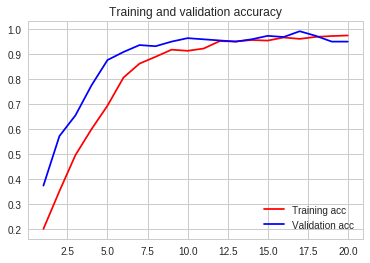

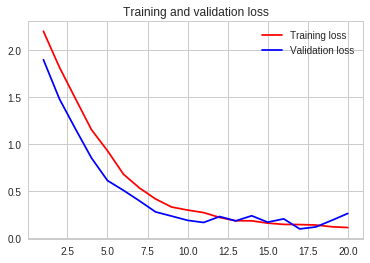

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

sns.set_style("whitegrid")
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [0]:
model.load_weights('best_model2.h5')

In [90]:
model.evaluate_generator(test_generator, steps= len(test_generator))

[0.0536056413753506, 0.9889705882352942]